In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from random import random

#### Linear Congruential Generators

A linear congruential generator (LCG) is a method of generating a sequence of pseudorandom numbers. The general form of a LCG is

$$
X_{i} = (aX_{i-1} + b) \mod m
$$

Define $U_i\in[0,1)$ by:

$$
U_i = \frac{X_i}{m}
$$

Then the numbers $U_i$ are used as uniform deviates.

where $X_0$ is the seed, $a$ is the multiplier, $c$ is the increment, and $m$ is the modulus. The modulus is usually a power of 2, which is efficient for computers to compute. The multiplier and increment are usually chosen to be large numbers, and the modulus is chosen to be a prime number. The modulus, multiplier, and increment are called the LCG's *parameters*.

The LCG is a simple and efficient method of generating random numbers. However, it has some drawbacks.

-   **short period**, which means that the sequence of pseudorandom numbers will eventually repeat itself.
-   **small state space**, which means that the sequence of pseudorandom numbers will eventually visit every number in the state space. 

## Criterions for Good Random Numbers

-   The period of repetition $p$ must be large.
-   The numbers must be distributed as intended. This can be checked by **statistical tests** on:
    1.  Calculate the mean $\hat \mu$ and variance $\hat s^2$ of the numbers, check if $\hat\mu\approx\mu$ and $\hat\sigma^2\approx s^2$.
    2.  Test for the autocorrelations of $U_i$ with previous $U_{i-k}$.
    3.  Estimate the density function $\hat f$ and check if $\hat f\approx f$.
-   The **lattice structure** of the numbers should not be visible. This can be checked by plotting the numbers in 2D or 3D.

## Random Numbers from $U(0,1)$

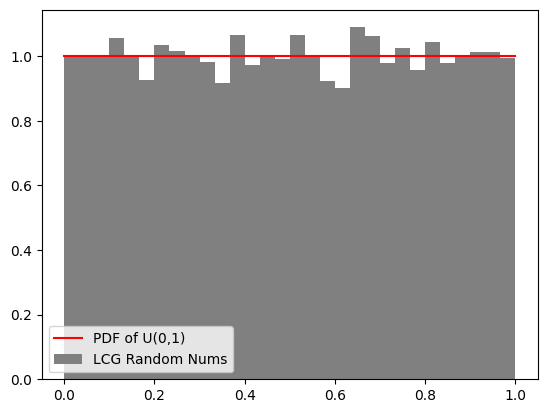

In [2]:
def lcg(n = 1, a = 1597, b = 51749, m = 244944, seed = 0) -> list:
    x = [0] * n
    x[0] = seed
    for i in range(1, n):
        x[i] = (a * x[i - 1] + b) % m
    return [i / m for i in x]

# reset plottign env
n = 10000
nums = lcg(n)
plt.figure()
x = np.linspace(0, 1, 100)
y = np.ones(100)
plt.plot(x, y, color = "red")
plt.hist(nums, bins = 30, density = True, color = "gray")
plt.legend(["PDF of U(0,1)", "LCG Random Nums"])
plt.show() # plt.show() suppresses the output of previous line

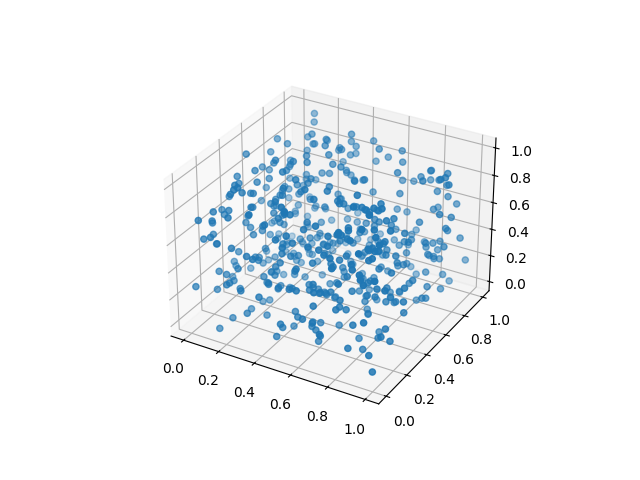

In [3]:
from os import name
import matplotlib.pyplot as plt
%matplotlib widget

# new plot
# Name figure "lattice structure"
fig = plt.figure("Lattice Structure")
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = nums[0:500], nums[1:501], nums[2:502]

# Plot a surface plot.
ax.scatter(X, Y, Z)
plt.show()

#### Lagged Fibonacci Generator

A Lagged Fibonacci generator (LFG) is a pseudorandom number generator that uses a Fibonacci sequence combined with a lagged linear congruential generator to yield a sequence of pseudorandom numbers. The general form of a LFG is:

$$
X_{i+1} = (X_{i-\nu} + X_{i-\mu}) \mod m
$$

> **Example**
> 
> $$
> U_i \coloneqq U_{i-17} + U_{i-15}
> $$
> 
> In case of $U_i <0$, we add $1$ to $U_i$ until $U_i\geq 0$.
> This is a simple example with reasonable features, but there are correlations. The algorithm has a “leg” with length 17. This requires an initial phase that provides 17 U-values to start the algorithm.

In [4]:
# Improved LCG by LFG using substraction
def lfg(n = 1, nu = 1, mu = 2, a = 1366, b = 150889, m = 714025, seed = 0):
    # Generate initial Fibonacci sequence
    fib_seq = [0] * mu
    fib_seq[0], fib_seq[1] = 1, 1
    for i in range(1, max(nu, mu)):
        fib_seq[i] = fib_seq[i - 1] + fib_seq[i - 2]
    
    N0 = fib_seq[nu] - fib_seq[mu]
    

## Random Number of Other Distributions

#### Inverse Transform Method

The inverse transform method is a method for generating random numbers from any probability distribution by using its inverse cumulative distribution function (iCDF). The general form of the inverse transform method is:

1.  Generate a random number $U$ from the uniform distribution on the interval $[0,1)$.
2.  Compute $X = F^{-1}(U)$, where $F^{-1}$ is the inverse of the cumulative distribution function $F$.

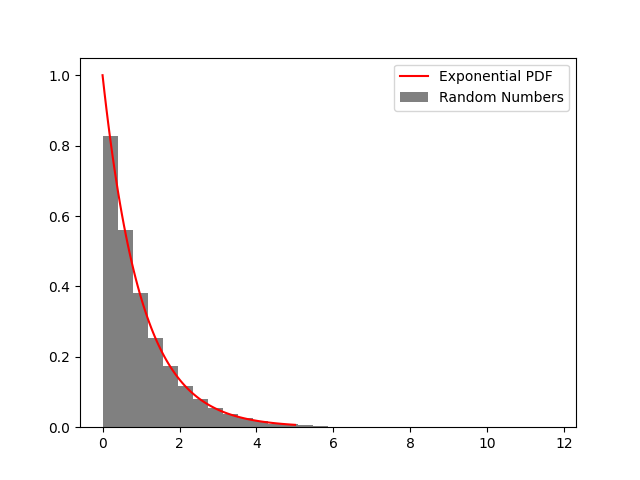

In [5]:
# Inverse transform method for exponential distribution

# PDF for exponential distribution
def pdf_exp(x, lambd = 1):
    return lambd * np.exp(-lambd * x)

# CDF for exponential distribution
def icdf_exp(x, lambd = 1):
    return -np.log(1 - x) / lambd

# Generating random uniform numbers
n = 10000
nums = lcg(n)

# Transforming to exponential distribution
nums_exp = [icdf_exp(i) for i in nums]

# Plotting
plt.figure()
x = np.linspace(0, 5, 100)
plt.plot(x, pdf_exp(x), color = "red")
plt.hist(nums_exp, bins = 30, density = True, color = "gray")
plt.legend(["Exponential PDF", "Random Numbers"])
plt.show()

#### Acceptance-Rejection Method

The acceptance-rejection method is a method for generating random numbers from a probability distribution where the probability density function (PDF) is known, but the cumulative distribution function (CDF) is not known. The general form of the acceptance-rejection method is:

1.  Generate a random number $U$ from the uniform distribution on the interval $[0,1)$.
2.  Generate a random number $X$ from the proposal distribution.
3.  If $U < \frac{f(X)}{Mg(X)}$, where $f$ is the PDF of the target distribution, $g$ is the PDF of the proposal distribution, and $M$ is a constant such that $f(x) \leq Mg(x)$ for all $x$, then accept $X$ as a random number from the target distribution. Otherwise, reject $X$ and repeat steps 1 and 2.

## Normal Random Variables

#### Box-Muller Transformation

Suppose we have two independent random variables $U_1, U_2\sim U(0,1)$. Define two new random variables $Z_1, Z_2$ by:

$$
\begin{aligned}
Z_1 &= \sqrt{-2\ln U_1}\cos(2\pi U_2) \\
Z_2 &= \sqrt{-2\ln U_1}\sin(2\pi U_2)
\end{aligned}
$$

Or equivalently:

$$
\begin{aligned}
U_1 &= \exp\left[-\frac{1}{2}(Z_1^2+Z_2^2)\right] \\
U_2 &= \frac{1}{2\pi}\arctan\left(\frac{Z_2}{Z_1}\right)
\end{aligned}
$$

Then $Z_1, Z_2$ are independent standard normal random variables.


In [6]:
def bmt(n):
    # Generating random uniform numbers
    nums = np.array(lcg(n * 2))
    u1, u2 = nums[0::2], nums[1::2] # Separating into two lists

    # Transforming to normal distribution using Box-Muller
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

    return z1, z2

C:\Users\Jason\AppData\Local\Temp\ipykernel_21084\3639314208.py:7: RuntimeWarning: divide by zero encountered in log
  z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
C:\Users\Jason\AppData\Local\Temp\ipykernel_21084\3639314208.py:8: RuntimeWarning: divide by zero encountered in log
  z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)


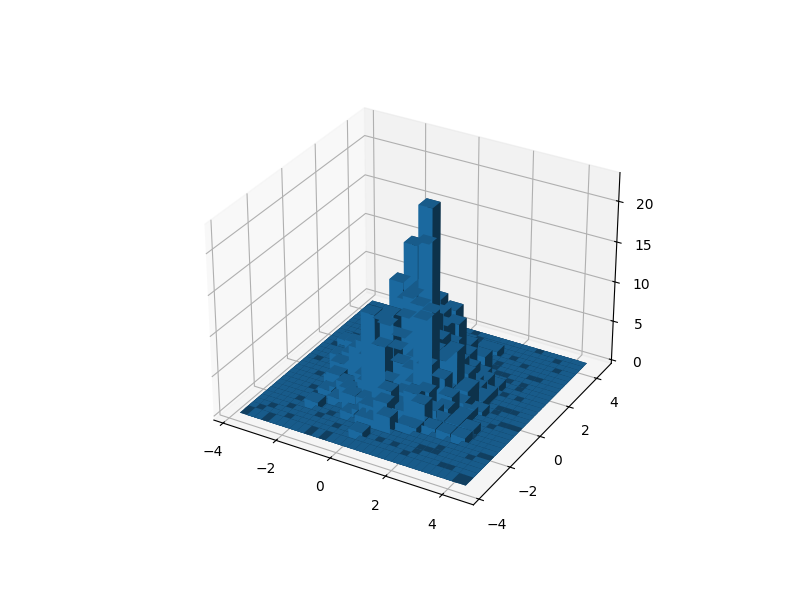

In [7]:
n = 1000
z1, z2 = bmt(n)

# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection = '3d')

hist, xedges, yedges = np.histogram2d(z1, z2, bins=30, range=[[-4, 4], [-4, 4]])
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
plt.show()


In [8]:
print("Hello World!")
print("hello")

Hello World!
hello
